# Análise de regressão

- _Análise de regressão_, ou simplesmente _regressão_, busca saber de que maneira uma variável pode predizer o comportamento da outra. 

- Algumas perguntas do mundo real:
    - Como o volume de vendas de canetas esferográficas muda se o preço da unidade subir? 
    - De que maneira a taxa de inflação deste ano pode predizer o aumento do aluguel para os próximos dois meses?
    - A que horas seria melhor sair da universidade para evitar ficar preso pelo tráfego intenso na via?

- Perguntas como essas exigem uma _resposta_ que pode ser expressa como uma combinação de uma ou mais _variáveis independentes_ (_preditores_, ou _covariantes_). 

- Objetivo da análise de regressão: _construir modelos preditivos a partir dos dados_.

> A origem do nome _regressão_ deve-se ao estatístico inglês do século XIX Sir Francis Galton. Galton usou o termo para interpretar resultados de um experimento sobre hereditariedade, para o qual coletou alturas de pais e filhos para realizar predições sobre alturas das próximas gerações. Percebendo que a altura de um filho "regredia" (era menor do que) em relação à altura de seus pais por um fator de 2/3, publicou um artigo intitulado _Regression towards Mediocrity in Hereditary Stature_ que, ironicamente, deu surgimento ao nome que usamos para o método estatístico que estamos aprendendo. Galton não aplicou o _método dos mínimos quadrados_ (que é a base teórica para a regressão linear), já conhecido há 80 anos antes de sua época por Gauss e Legendre. Ele simplesmente "traçou uma reta". Para Galton, a "regressão" representava apenas uma tendência de os dados "reverterem" a tendência média. Isto é, a origem do método _regressão_ é uma "ironia do destino".

## Regressão linear

Tenta ajustar um modelo matemático aos dados disponíveis cuja resposta ${\bf y}$ depende linearmente de até $d$ preditores. 

$${\bf y} = a_1{\bf x}_1 + a_2{\bf x}_2 + \ldots + a_d{\bf x}_d,$$

$a_i \in \mathbb{R}, \, i = 1,\ldots d$, são os _parâmetros_ ou _coeficientes_ do modelo e os ${\bf x}_i$ as variáveis. 

Como _sistema matricial_, assume a forma ${\bf y} = {\bf X}{\bf a}$, onde 

$${\bf y} = 
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n \\
\end{bmatrix},
\quad
{\bf X} =
\begin{bmatrix}
x_{11} & x_{12} & \ldots & x_{1d} \\
x_{21} & x_{22} & \ldots & x_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \ldots & x_{nd}
\end{bmatrix},
\quad
{\bf a} = 
\begin{bmatrix}
a_1 \\
a_2 \\
\vdots \\
a_n \\
\end{bmatrix}.$$


### Regressão linear simples

- A _regressão linear simples_ contém apenas um regressor e o modelo é a equação analítica de uma reta. Escrevemos

$${\bf y} = a_0 + a_1{\bf x},$$

onde $a_0$ é o _termo constante_, também chamado de _offset_ ou _intercept_, e $a_1$ é a _inclinação_. 

- Quais seriam os valores de $a_0$ e $a_1$ que produziriam a melhor reta para os dados? 
    - _Mínimos quadrados_ (_least squares_). 

#### Mínimos quadrados

- Distância Euclidiana entre os valores preditos (modelados) e os valores disponíveis (conhecidos) deve ser _minimizada_.

$$\|\bf{r}\|^2 =  \|\bf{y} - (a_0 + a_1\bf{x})\|^2 = \sum_{j=1}^{n}(y_j - a_0 - a_1x_j)^2,$$

- Problema é de otimização e equivale a buscar o ponto de mínimo global $(a_0,a_1)$ de uma função quadrática $F(x,y)$. Grosso modo, achar $(a_0,a_1)$, tal que

$$\frac{\partial F}{\partial a_0} = 0, \ \ \frac{\partial F}{\partial a_1} = 0.$$

## Estudo de caso: o gelo marinho e as mudanças climáticas

Vamos entender a _análise de regressão_ por meio de um estudo de caso. A pergunta que queremos responder é:

> A queda na área coberta por gelo no mar é causada pela alteração do clima? 

Vamos trabalhar com o _dataset_ G02135 - Sea Ice Index, Version 3, 
do [NSIDC](https://nsidc.org/data/G02135/versions/3).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.stats as sts
import matplotlib.pyplot as plt

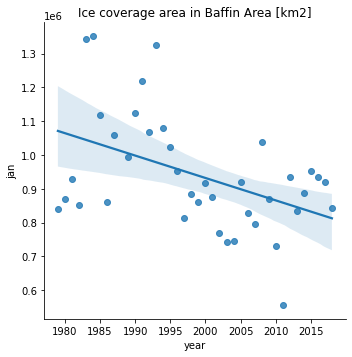

In [60]:
sii = pd.read_csv('../database/Sea_Ice_Index_Monthly_Baffin-Area-km^2.csv')
month = 'jan'
s = sb.lmplot(x='year',y=month,data=sii,fit_reg=True);
s.set(title='Ice coverage area in Baffin Area [km2]');

Comentários:

- A função `lmplot()` realiza a análise de regressão simples com o modelo linear (reta) a partir dos dados passados.
- O _dataset_ em questão mostra que a área de cobertura do gelo na área de Baffin está sob uma tendência de declínio desde 1980.
- A reta da regressão pode ser retirada do gráfico usando `fit_reg=False`.

A seguir, "desdobramos" o _DataFrame_ original para realizar uma análise de regressão durante os anos de 1997 a 2017 levando em conta valores mensais.

In [65]:
# intervalo de 20 anos
siif = sii.set_index('year').loc[1997:2017]

# desdobra o DataFrame
siif2 = pd.DataFrame(columns=['year','month','area'])
for i in siif.index:
    # astype('float') necessário aqui, pois como 'Int64' temos erro de SVD em lmplot
    c1 = pd.Series(np.full(12,i)).astype('float')        
    c2 = pd.Series(range(1,13)).astype('float') 
    c3 = siif.loc[i]      
    d = pd.DataFrame({'year':c1,'month':c2,'area':c3.values})
    siif2 = pd.concat([siif2,d],axis=0)    

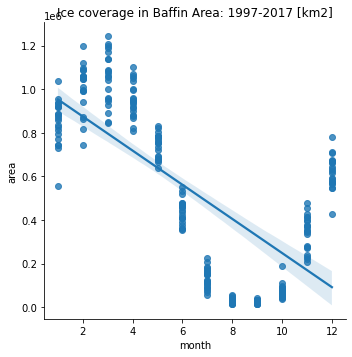

In [66]:
sb.lmplot(x='month',y='area',data=siif2).set(title='Ice coverage in Baffin Area: 1997-2017 [km2]');    

Comentários: 
- Pode se ver que ao longo do ano, a cobertura de gelo segue um padrão periódico. Todavia, a análise de regressão mostra que há uma tendência de declínio da cobertura. 
- A flutuação periódica é coerente com as estações do ano.
- O declínio se verifica pela queda da amplitude do ciclo periódico.

### Normalização dos dados

Para evitar a flutuação, normalizaremos a área usando desvios em relação às médias mensais e o percentual relativo à média para o período de anos estudado. A expressão matemática é dada por

$$\tilde{\bf a}_i = 100\frac{({\bf a}_i - \mu_i)}{\mu}, \ \ i = 1,\ldots, 12,$$

onde $\tilde{\bf a}_i$ é a série contendo valores das áreas normalizadas, ${\bf a}_i$ a série contendo valores das áreas originais, $\mu_i$ as médias, para o $i$-ésimo mês, e $\mu$ é a média das áreas para todo o período de 20 anos (todos os meses).

In [68]:
import warnings; warnings.simplefilter('ignore') 

siif2['arean'] = siif2['area']

for i in np.linspace(1,12,12):
    siif2.arean[siif2.month == i] = 100*(siif2.arean[siif2.month == i] - \
                                         siif2.arean[siif2.month == i].mean()) \
                                         /siif2.area.mean()

Plotando os dados normalizados, vemos o seguinte gráfico.

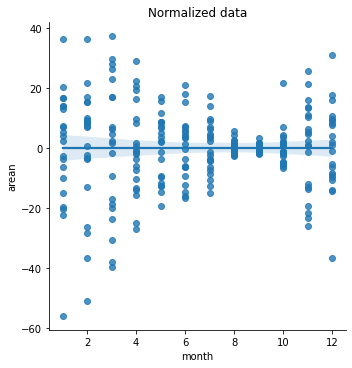

In [70]:
sb.lmplot(x='month',y='arean',data=siif2).set(title='Normalized data');    

### Regressão sobre dados normalizados

Realizando uma nova análise de regressão para todo o período de 20 anos, com 95% de índice de confiança, visualizamos uma permanente tendência negativa. 

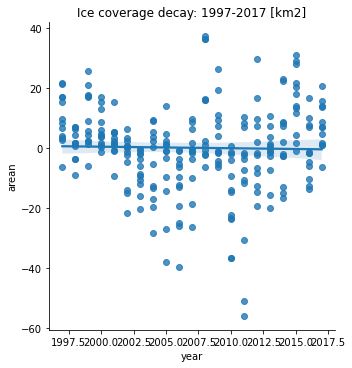

In [72]:
# eixo x como 'float' devido 
# à incompatibilidade de lmplot com type 'Int64'
sb.lmplot(x='year',y='arean',data=siif2).set(title='Ice coverage decay: 1997-2017 [km2]');

> Conclusão do estudo: embora haja variações de ano a ano, nota-se uma tendência de queda na corbertura da área de gelo na área estudada. Esta diminuição da área de cobertura do gelo leva-nos a crer que o aquecimento global é a causa direta deste fenômeno.

### Análise quantitativa 

No caso anterior, fizemos uma análise _qualitativa_ (visual) de como a área de cobertura de gelo (resposta) diminuiu ao longo do ano (preditor). Entretanto, ainda não temos uma ideia _quantitativa_ deste modelo. Para saber a equação da análise de regressão, podemos utilizar alguns métodos. 

#### `scipy.stats.linregress`

A primeira forma que temos para encontrar a equação do modelo linear é usar `scipy.stats.linregress`.

In [75]:
res = sts.linregress(siif2['year'],siif2['arean'])
 
# inclinação, intercept, coef. de correlação
m,b,rho = res.slope,res.intercept,res.rvalue
(m,b,rho)

(-0.051080057519927086, 102.51767544249365, -0.02247112769096617)

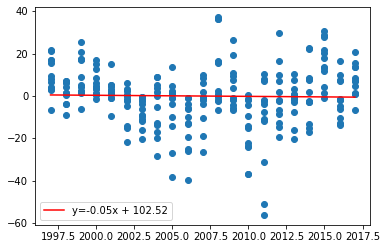

In [76]:
plt.scatter(x=siif2['year'],y=siif2['arean'])

# eq. da reta
xx = np.unique(siif2['year'])
yy = m*xx + b

plt.plot(xx,yy,'r-',label=f'y={round(m,2)}x + {round(b,2)}')
plt.legend(loc=3);

#### `sklearn.linear_model.LinearRegression`

Outra forma é usar `sklearn.linear_model.LinearRegression`.

In [77]:
from sklearn.linear_model import LinearRegression

# modelo de ajuste
lr = LinearRegression(fit_intercept=True)

# resolvendo (input deve ser array 2D)
res2 = lr.fit(siif2[['year']],siif2[['arean']])

# slope, intercept
m2,b2 = res2.coef_[0][0], res2.intercept_[0]
m2,b2

(-0.051080057519926975, 102.51767544249344)

Comentários:

- Verificamos que os valores de _slope_ (coeficiente angular) e _intercept_ (coeficiente linear) obtidos tanto por `sklearn.linear_model.LinearRegression` quanto por `scipy.stats.linregress` são equivalentes.

### Preditores e estimadores

- Estimadores geram predições a partir da análise de regressão. 

- _Métricas_ populares: 
    - _erro quadrático médio_ (ou _MSE_, do inglês _mean squared error_), que fornece uma "média" do quadrado dos $n$ erros existentes pontualmente entre a série de dados conhecidos $\{y_i\}$ e a série de dados estimados $\{\hat{y}_i\}$. O MSE pode ser definido em termos de um _preditor_ ou de um _estimador_. Ambos os conceitos são levemente distintos. Por conveniência de entendimento, vamos utilizar a definição do primeiro caso, que é:

$$\text{MSE} = \frac{1}{n}\sum_{i=1}^n (y_i -\hat{y}_i)^2$$

- _coeficiente de determinação_, que mede a "qualidade" do ajuste. Este coeficiente é simplesmente o quadrado do coeficiente de correlação. Comumente, ele é denotado por $R^2$. Mais comumente, adota-se que $ 0 \leq R^2 \leq 1$. Todavia, dependendo de como ele for definido, valores negativos serão possíveis. Em suma, sua interpretação é a seguinte: se $R^2 = 0$, o ajuste é o pior possível; se $R^2 = 1$, o melhor possível.

Vamos calcular essas métricas para um conjunto de dados do `sklearn` sobre diabetes.

In [78]:
from sklearn import metrics, datasets

In [79]:
# dataset "diabetes"
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y=True)

# usa apenas uma feature
diabetes_x = diabetes_x[:,np.newaxis,2]

# separação dos dados entre "treinamento" e "teste"
# a predição ocorrerá para o conjunto de "teste"

# preditor
diabetes_x_treino = diabetes_x[:-20] # 422 valores
diabetes_x_teste = diabetes_x[-20:] # 20 valores

# resposta
diabetes_y_treino = diabetes_y[:-20] # 422 valores
diabetes_y_teste = diabetes_y[-20:] # 20 valores

# modelo de RL
linregr = LinearRegression(fit_intercept=True)

# treinamento do modelo
linregr.fit(diabetes_x_treino,diabetes_y_treino)

# predição
diabetes_y_predicao = linregr.predict(diabetes_x_teste)

Agora, verificamos a qualidade do ajuste dos dados pela regressão linear.

In [81]:
# MSE
metrics.mean_squared_error(diabetes_y_teste,diabetes_y_predicao)

2548.0723987259703

In [82]:
# R2
metrics.r2_score(diabetes_y_teste, diabetes_y_predicao)

0.47257544798227136

Uma plotagem gráfica simples nos dá a melhor reta de ajuste para os dados segundo o método de mínimos quadrados.

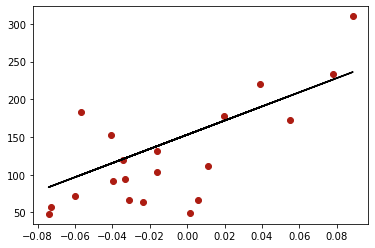

In [83]:
plt.scatter(diabetes_x_teste,diabetes_y_teste,color='#ad1c12')
plt.plot(diabetes_x_teste,diabetes_y_predicao,'-k');

Uma vez que temos à disposição os coeficientes do ajuste, podemos predizer valores em locais desconhecidos.

(938.2378612512633, 152.91886182616167)


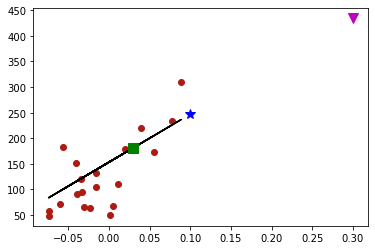

In [84]:
# slope, intercept
m3,b3 = linregr.coef_[0],linregr.intercept_
print((m3,b3))

# plot
plt.scatter(diabetes_x_teste,diabetes_y_teste,color='#ad1c12')
plt.plot(diabetes_x_teste,diabetes_y_predicao,'-k');

# estimativas
x_est1, x_est2, x_est3 = 0.03, 0.10, 0.3
p = lambda x: m3*x + b3
plt.plot(x_est1,p(x_est1),'sg',ms=10)
plt.plot(x_est2,p(x_est2),'*b',ms=10)
plt.plot(x_est3,p(x_est3),'vm',ms=10);

Comentários:

- Os 3 pontos são colineares. Ou seja, pertencem à reta. 
- O triângulo rosa seria considerado uma _extrapolação_, já que é uma estimativa feita muito "além do conhecido". Ele segue a tendência linear, mas pode ser uma previsão bastante errônea.

## Regressão múltipla

- Na regressão múltipla, há mais do que um preditor (covariante) envolvido. 

- Neste caso, em vez de uma reta, o modelo matemático é um _hiperplano_. 

- O _dataset_ [Advertising.csv]() contém informação sobre orçamentos destinados para anúncios em TV, rádio e jornal, bem como sobre o número de vendas em unidades não declaradas. 

- Objetivo da análise de regressão: saber como esses orçamentos influenciam a venda de produtos.

In [86]:
# importa statsmodels 
import statsmodels.api as sm

In [87]:
# carrega dataset
ad = pd.read_csv('../database/Advertising.csv',index_col=0)
ad.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Uma visão geral sobre a distribuição dos dados é obtida com a plotagem múltipla dos histogramas.

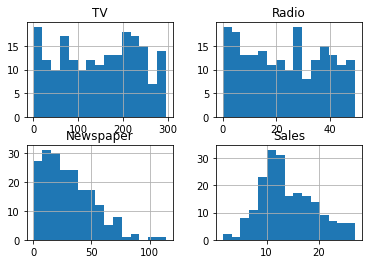

In [88]:
# histogramas
ad.hist(bins=15);

Realizamos a análise de regressão linear para verificar se poderíamos usar a variável `TV` para predizer as vendas.

In [89]:
y_ad = ad['Sales']
X_ad = ad['TV']
X_ad = sm.add_constant(X_ad)
lr = sm.OLS(y_ad,X_ad).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           1.47e-42
Time:                        11:46:31   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# R^2
lr.rsquared

0.611875050850071

Comentário:

- $R^2 \approx 0.61$ indica que cerca de 61% da variância na relação TV-vendas pode ser explicada pelo modelo `lr`.

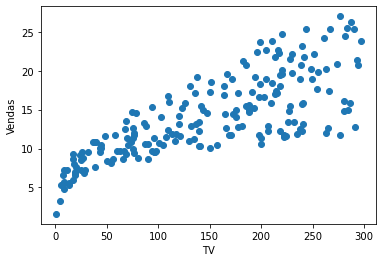

In [22]:
plt.scatter(ad['TV'],ad['Sales']);
plt.xlabel('TV')
plt.ylabel('Vendas');

Embora o valor de $R^2$ seja razoável, vamos repetir a análise, mas agora com a variável `Radio`.

In [92]:
y_ad2 = ad['Sales']
X_ad2 = ad['Radio']
X_ad2 = sm.add_constant(X_ad2) 
lr2 = sm.OLS(y_ad2,X_ad2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           4.35e-19
Time:                        11:48:59   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Igualmente, podemos fazer um plot de dispersão.

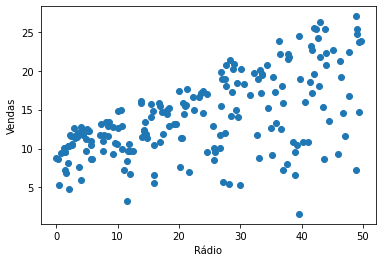

In [24]:
plt.scatter(ad['Radio'],ad['Sales']);
plt.xlabel('Rádio')
plt.ylabel('Vendas');

In [93]:
lr2.rsquared

0.33203245544529525

Neste caso, o modelo retorna um valor de $R^2$ pior do que o anterior. Este valor seria considerado "ruim". Mas, e se ambos os preditores forem postos juntos no modelo?

Vejamos o que ocorre.

In [94]:
y_ad3 = ad['Sales']
X_ad3 = ad[['TV','Radio']]
X_ad3 = sm.add_constant(X_ad3)
lr3 = sm.OLS(y_ad3,X_ad3).fit() 
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           4.83e-98
Time:                        11:50:08   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
lr3.rsquared 

0.8971942610828956

Com ambos os preditores, o valor de $R^2$ saltou para quase 90%, um número melhor! Assim, percebemos que a regressão múltipla resulta em um modelo mais acurado do que os modelos para regressão simples individuais.

Para ver o plano da regressão múltipla, devemos fazer uma plotagem tridimensional.

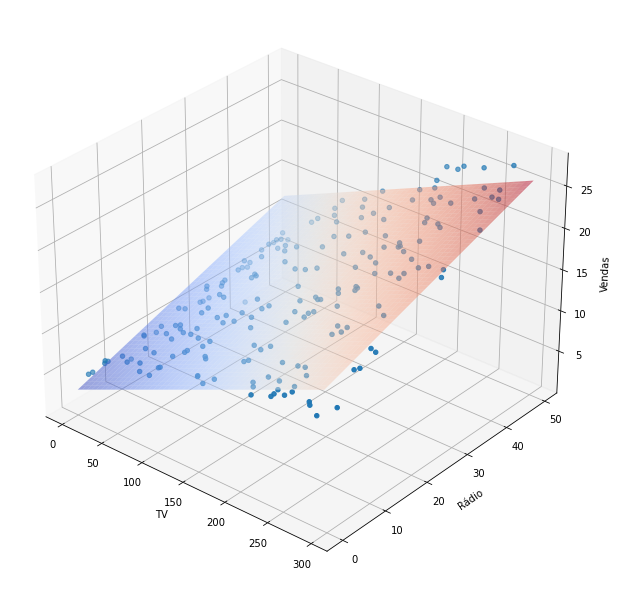

In [103]:
from mpl_toolkits.mplot3d import Axes3D

# X e Y usando tamanhos de TV and Radio
X_axis, Y_axis = np.meshgrid(np.linspace(ad['TV'].min(), ad['TV']. max(), 100), 
                             np.linspace(ad['Radio'].min(), ad['Radio'].max(), 100))

# equação do hiperplano calculando o eixo Z correspondente (Sales)
# z = a0 + a1x + a2y
Z_axis = lr3.params[0] + lr3.params[1] * X_axis + lr3.params[2] * Y_axis

# cria eixo 3D
fig = plt.figure(figsize=(12, 8)) # figsize refers to width and height of the figure
ax = Axes3D(fig, azim=-50)

# plota o hiperplano
ax.plot_surface(X_axis, Y_axis, Z_axis, cmap=plt.cm.coolwarm, alpha=0.5, linewidth=0)

# plota dispersão 
ax.scatter(ad['TV'], ad['Radio'],ad['Sales'])

# labels
ax.set_xlabel('TV'); ax.set_ylabel('Rádio'); ax.set_zlabel('Vendas');

> A conclusão da última análise é que as vendas são, de fato, impulsionadas, se houver cada vez mais investimento em propaganda via rádio e televisão. 

### Estimando valores

Digamos que, como um analista de mercado, você tem interesse em prever quanto atingiria em vendas investindo $t$ e $r$ unidades monetárias (p.ex. milhares de reais) em anúncios na TV e rádio, respectivamente. 

Como fizemos na regressão simples, basta substituir valores na equação do plano e verificar a resposta.

In [100]:
venda_pred = lambda t,r: lr3.params[0] + lr3.params[1]*t + lr3.params[2]*r
venda_pred(102,31)

13.415912077944483

In [101]:
venda_pred(253,44)

22.768814104270994

In [102]:
venda_pred(619,101)

50.23074734862246

Conforme a própria inclinação do plano mostra, à medida que aumentamos o investimento em ambos os canais de divulgação, as vendas aumentam.

## Inspeção de multicolinearidade

- É possível inspecionar a relação entre variáveis (preditores) através de um _scatter matrix plot_.

- Com a matriz dos gráficos de dispersão, verificamos a _multicolinearidade_, isto é se pares de variáveis se correlacionam de modo linear, ou não.

### `pandas.plotting.scatter_matrix`

Plota dispersões entre séries de um _DataFrame_.

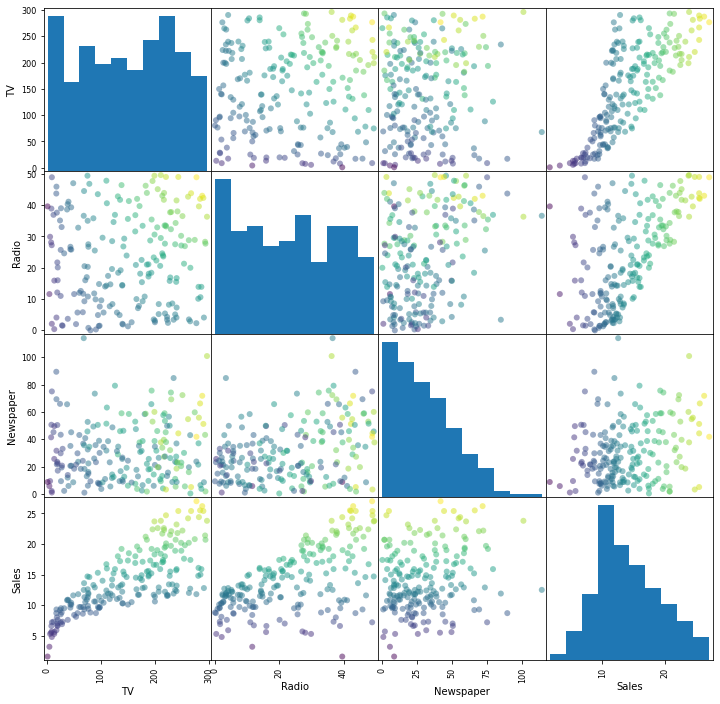

In [104]:
pd.plotting.scatter_matrix(ad,figsize=(12,12),grid=True,marker='o', c= ad['Sales']);

### `seaborn.pairplot`

Faz o mesmo que a função anterior. Entretanto, há uma série de opções adicionais. 

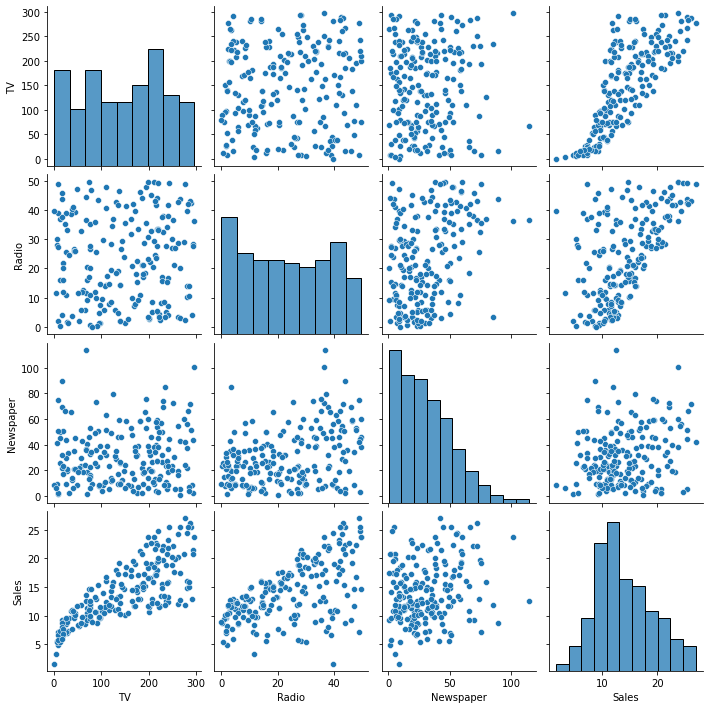

In [105]:
sb.pairplot(ad);

Para incluir as retas de regressão, adicione `kind='reg'`.

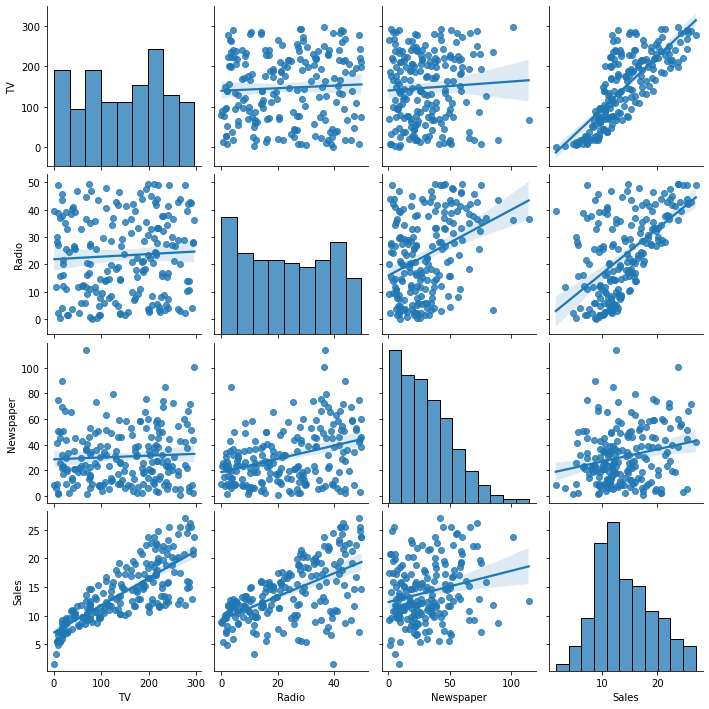

In [106]:
sb.pairplot(ad,kind='reg');

### `seaborn.heatmap`

O _heat map_ (mapa de calor) é uma matriz de cores útil para mostrar visualmente coeficientes de correlação entre duas variáveis. As cores quentes representam alta correlação; as frias, baixa correlação. 

Podemos criar um mapa de calor para o _DataFrame_ dos anúncios com a ajuda da função `pandas.corr()`. 

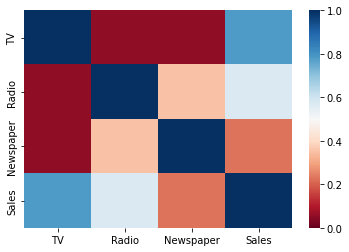

In [35]:
sb.heatmap(ad.corr(),vmin=0,vmax=1,cmap='RdBu');

Comentários: 
- `vmin` e `vmax` são limitantes para a escala de cores.
- `cmap` controla o mapa de cores. Para saber as opções possíveis, verifique `help(plt.colormaps)`

## Exercício aplicado

- Use a série `Newspaper` para criar um modelo de regressão múltipla com os três covariantes do _dataset_ [Advertising.csv](https://github.com/gcpeixoto/ICD/blob/main/database/Advertising.csv) e faça predições. Note que o seu hiperplano tem imagem real, mas pertence ao $\mathbb{R}^3$.